<a href="https://colab.research.google.com/github/hridog00/ApredizajeSupervisado/blob/master/Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2: Validación y evaluación en regresión y clasificación

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* 60% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

Información útil:
* Para crear celdas en el notebook, usa el botón "+" del menú situado en la esquina superior izquierda.
* Para ejecutar una celda (texto o código), pulsa el botón "Run" del menú situado en la esquina superior izquierda.
* Recuerda cambiar el tipo de celda de forma adecuada con el menú superior.
* Más información sobre notebooks en la documentación oficial: https://jupyter.readthedocs.io/en/latest/

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error MAE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 50%-50% hasta un 95%-5%, de 5% en 5%) para un dataset de regresión (el que se desee).

Prueba con  0.5 - 0.5  Error: 6.477785936352701
Prueba con  0.55 - 0.45  Error: 6.550189322226429
Prueba con  0.6 - 0.4  Error: 6.619216699995124
Prueba con  0.65 - 0.35  Error: 6.569361468895589
Prueba con  0.7 - 0.3  Error: 6.6181274159976216
Prueba con  0.75 - 0.25  Error: 6.262755282238796
Prueba con  0.8 - 0.2  Error: 6.250087361677344
Prueba con  0.85 - 0.15  Error: 6.197074663402691
Prueba con  0.9 - 0.1  Error: 6.596681749622927
Prueba con  0.95 - 0.05  Error: 6.607275641025642


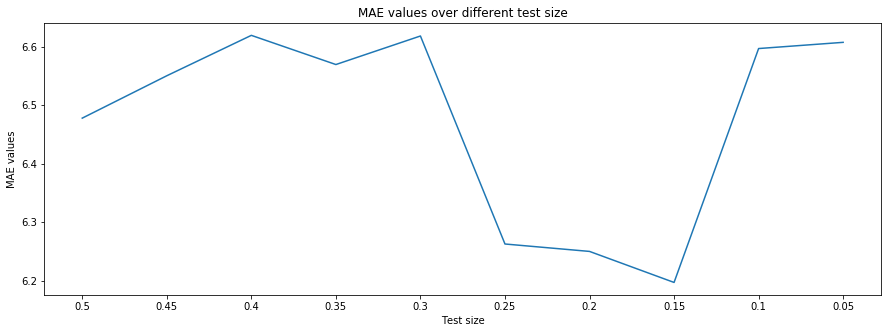

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Cargamos el dataset
df = datasets.load_boston()

# Algoritmo de aprendizaje
reg = DummyRegressor()

errores_MAE = []
test_size_values = []
test_size = 0.5
while test_size > 0:
    #division entre conjunto de entrenamiento y test
    X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=test_size, random_state=0)
    #entrnemos el modelo
    reg.fit(X_train, y_train)
    #realizamos la predicción
    y_pred = reg.predict(X_test)
    #obtenemos el error
    error = mean_absolute_error(y_pred, y_test)

    print("Prueba con ",1-test_size,"-",test_size," Error:", error)

    #guardaos el error y modificamos el porcentaje de división entre conjuntos de train y test
    errores_MAE.append(error)
    test_size_values.append(str(test_size))
    test_size -= 0.05
    test_size = round(test_size, 2)
    
#representamos los valores obtenidos
plt.figure(figsize=(15,5))
plt.plot(test_size_values, errores_MAE)
plt.xlabel("Test size")
plt.ylabel("MAE values")
plt.title("MAE values over different test size")
plt.show()

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de exactitud, en lugar de MAE).

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Prueba con  0.5 - 0.5  Error: 0.3146067415730337
Prueba con  0.55 - 0.45  Error: 0.2839506172839506
Prueba con  0.6 - 0.4  Error: 0.3055555555555556
Prueba con  0.65 - 0.35  Error: 0.36507936507936506
Prueba con  0.7 - 0.3  Error: 0.37037037037037035
Prueba con  0.75 - 0.25  Error: 0.17777777777777778
Prueba con  0.8 - 0.2  Error: 0.3333333333333333
Prueba con  0.85 - 0.15  Error: 0.25925925925925924
Prueba con  0.9 - 0.1  Error: 0.3888888888888889
Prueba con  0.95 - 0.05  Error: 0.4444444444444444


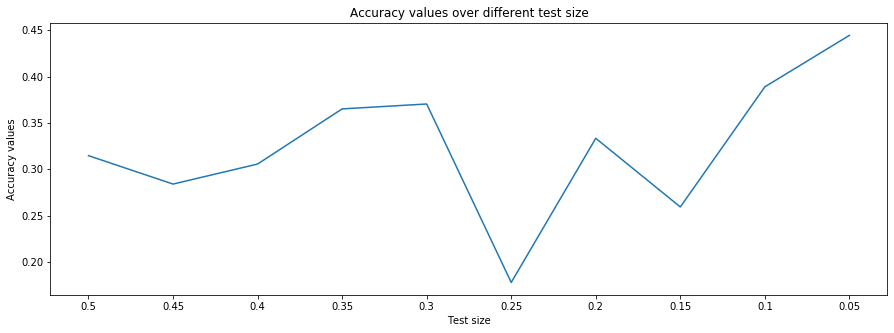

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargamos el dataset
df = datasets.load_wine()

# Algoritmo de aprendizaje
clf = DummyClassifier()

errores_accuracy = []
test_size_values = []
test_size = 0.5
while test_size > 0:
    #division entre conjunto de entrenamiento y test
    X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=test_size, random_state=0)
    #entrnemos el modelo
    clf.fit(X_train, y_train)
    #realizamos la predicción
    y_pred = clf.predict(X_test)
    #obtenemos el error
    error = accuracy_score(y_pred, y_test)

    print("Prueba con ",1-test_size,"-",test_size," Error:", error)

    #guardaos el error y modificamos el porcentaje de división entre conjuntos de train y test
    errores_accuracy.append(error)
    test_size_values.append(str(test_size))
    test_size -= 0.05
    test_size = round(test_size, 2)
    
#representamos los valores obtenidos
plt.figure(figsize=(15,5))
plt.plot(test_size_values, errores_accuracy)
plt.xlabel("Test size")
plt.ylabel("Accuracy values")
plt.title("Accuracy values over different test size")
plt.show()

### Ejercicio 3 (2 puntos)

Cree un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE usando los regresores OLS y KNN en validación cruzada con 10 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

In [0]:
import pandas as pd
def load_cars():
    column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                    'Acceleration', 'Model Year', 'Origin']

    data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
                names=column_names,
                        na_values = "?", comment='\t',
                        sep=" ", skipinitialspace=True)
    data = data.dropna()

    y = data.pop('MPG').values
    X = data.values
    return X, y

In [0]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Carga de datos.
data = {}
data['boston'] = datasets.load_boston(return_X_y=True)
data['diabetes'] = datasets.load_diabetes(return_X_y=True)
data['cars'] = load_cars()

# Algoritmo de aprendizaje.
ols = LinearRegression()
k = 10
knn = KNeighborsRegressor(n_neighbors = k)
modelos = {}
modelos['ols'] = ols
modelos['knn'] = knn

# Métricas de evaluación.
metricas = {
  'MAE':  mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100
}


In [90]:
# Vector de resultados
resultados = pd.DataFrame([], columns=['MAE', 'MAPE', 'RMSE'])

for i in modelos.keys():
    model = modelos[i]
    for dataset in data.keys():
        X, y = data[dataset]
        # Validación y evaluación del modelo.
        y_pred = cross_val_predict(model, X, y, cv = KFold(n_splits=10, random_state=1))
        #print('MAE',metricas['MAE'](y, y_pred), 'MAPE',metricas['MAPE'](y, y_pred), 'RMSE',metricas['RMSE'](y, y_pred))
        resultados = resultados.append(pd.DataFrame({'MAE':[metricas['MAE'](y, y_pred)], 'MAPE':[metricas['MAPE'](y, y_pred)], 'RMSE':[metricas['RMSE'](y, y_pred)]}, index = [i+"+"+dataset]))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

In [91]:
resultados

,MAE,MAPE,RMSE
ols+boston,3.997306,21.201154,5.877045
ols+diabetes,44.214396,39.465002,54.763421
ols+cars,2.719005,12.776536,3.555344
knn+boston,6.841265,33.622746,9.528536
knn+diabetes,46.331674,40.614624,58.470362
knn+cars,3.251607,13.863232,4.376816


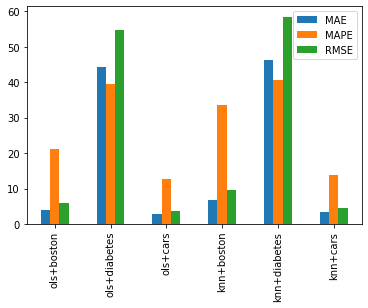

In [92]:
resultados.plot.bar()

### Ejercicio 4 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos; b) función de distancia; c) con/sin normalización previa de atributos. Para ello, pruebe al menos dos configuraciones distintas de cada aspecto. Use tres datasets diferentes en validación leave-one-out en la comparativa de resultados.

### Ejercicio 5 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).